###	Processed Data Importing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
eurobank = pd.read_csv('processed_data.csv')

In [ ]:
print("\nVerifying the loaded processed data:")
eurobank.head()


Verifying the loaded processed data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


### Subscribers by Marital Status

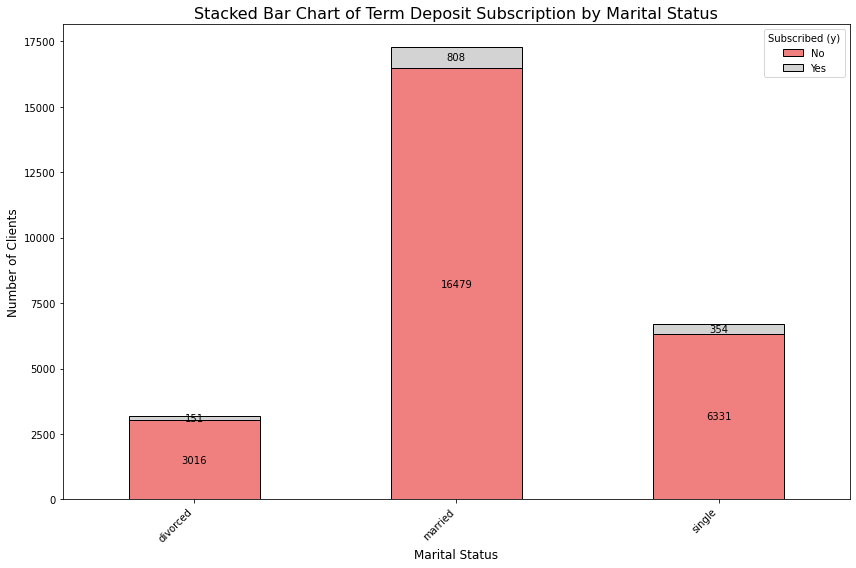

In [ ]:
# Filter out 'unknown' marital status
eurobank_filtered = eurobank[eurobank['marital'] != 'unknown']

# Group the data by marital status and the target variable (y) to count subscribers and non-subscribers
marital_counts = eurobank_filtered.groupby(['marital', 'y']).size().unstack().fillna(0)

colors = ['lightcoral', 'lightgrey']

ax = marital_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors, edgecolor='black')

plt.title('Stacked Bar Chart of Term Deposit Subscription by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.legend(title='Subscribed (y)', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

### Subscribers by Housing Loan, Personal Loan and Default Status

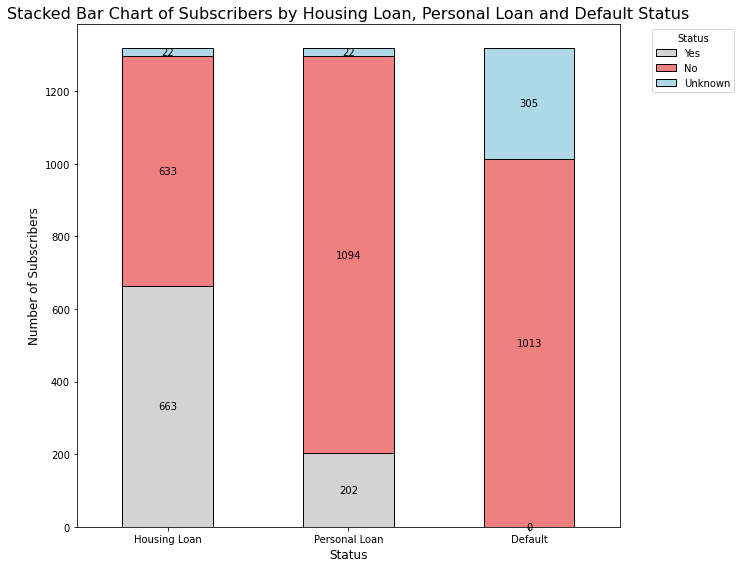

In [ ]:
# Filter for subscribers
subscribers = eurobank[eurobank['y'] == 'yes']

# Define a function to get counts for each status (yes, no, unknown)
def get_status_counts(column):
    counts = subscribers[column].value_counts()
    return counts.reindex(['yes', 'no', 'unknown'], fill_value=0)

housing_counts = get_status_counts('housing')
loan_counts = get_status_counts('loan')
default_counts = get_status_counts('default')

df_counts = pd.DataFrame({
    'Housing Loan': housing_counts,
    'Personal Loan': loan_counts,
    'Default': default_counts
}).T

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting each status with different colors
df_counts.plot(kind='bar', stacked=True, color=['lightgrey', 'lightcoral', 'lightblue'], ax=ax,edgecolor='black')

plt.title('Stacked Bar Chart of Subscribers by Housing Loan, Personal Loan and Default Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number of Subscribers', fontsize=12)
plt.xticks(rotation=0)  # No rotation needed for x-axis labels

for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Display the numbers within the bars

plt.legend(title='Status', labels=['Yes', 'No', 'Unknown'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

### Term Deposit Subscription by Month

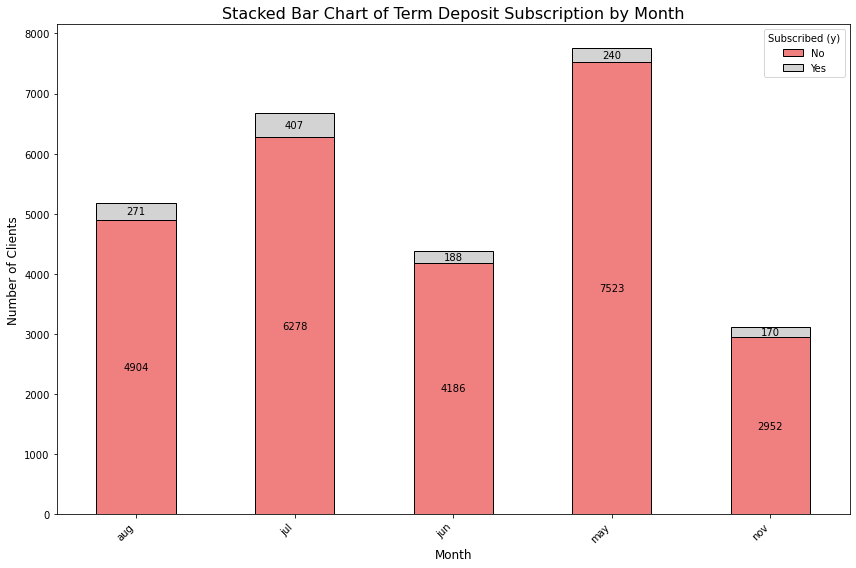

In [ ]:
# Filter out 'Oct' month
eurobank_filtered = eurobank[eurobank['month'] != 'oct']

# Group the data by month and the target variable (y) to count subscribers and non-subscribers
monthly_counts = eurobank_filtered.groupby(['month', 'y']).size().unstack().fillna(0)

colors = ['lightcoral', 'lightgrey']

ax = monthly_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors, edgecolor='black')

plt.title('Stacked Bar Chart of Term Deposit Subscription by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.legend(title='Subscribed (y)', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

### Term Deposit Subscription by Day of Week

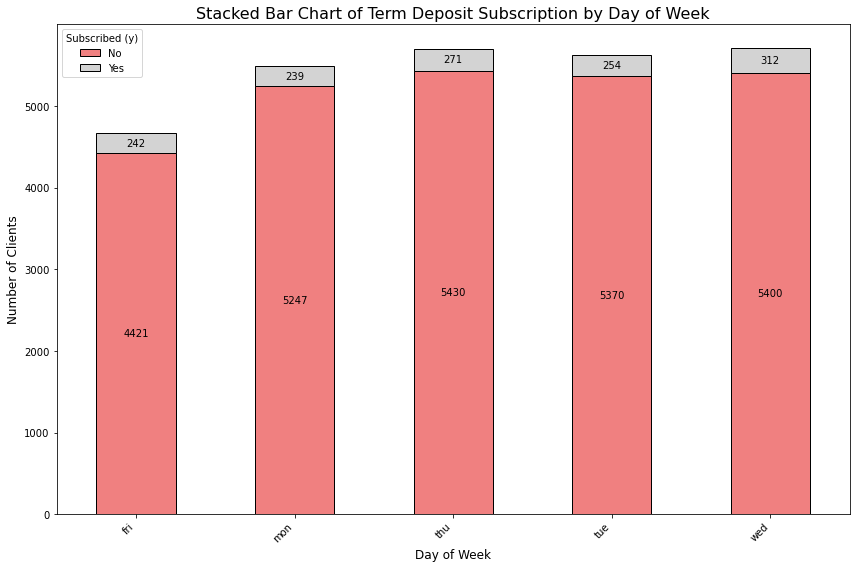

In [ ]:
# Filter out 'unknown' day of the week
eurobank_filtered = eurobank[eurobank['day_of_week'] != 'unknown']

# Group the data by day of the week and the target variable (y) to count subscribers and non-subscribers
day_counts = eurobank_filtered.groupby(['day_of_week', 'y']).size().unstack().fillna(0)

colors = ['lightcoral', 'lightgrey']

ax = day_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors, edgecolor='black')

plt.title('Stacked Bar Chart of Term Deposit Subscription by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.legend(title='Subscribed (y)', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()